In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

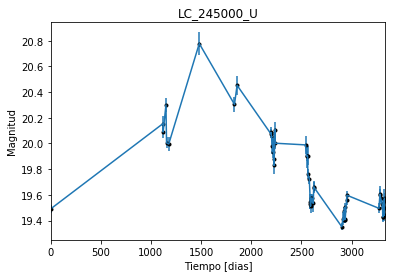

In [2]:
data = np.genfromtxt('LC_245000_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_245000_U')
plt.savefig("LC_245000_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

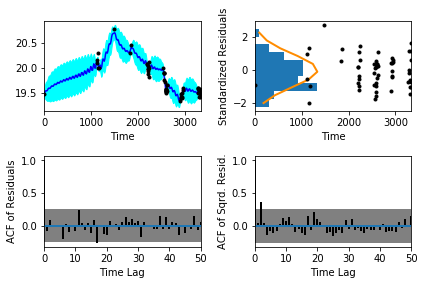

In [5]:
sample.assess_fit()

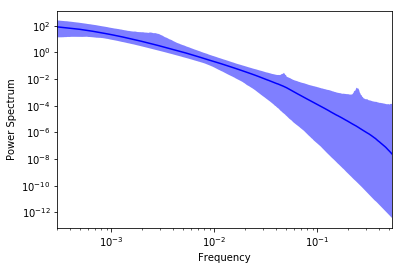

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

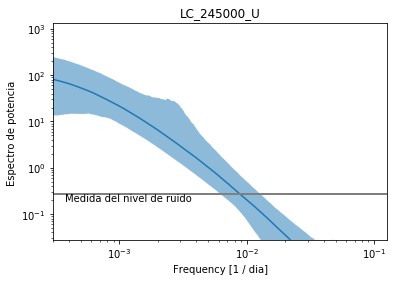

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_245000_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_245000_U')

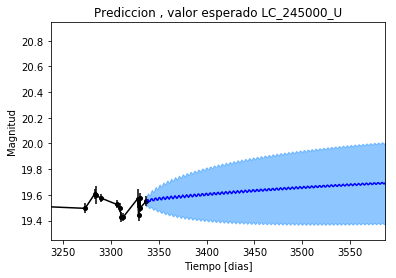

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_245000_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_245000_U')

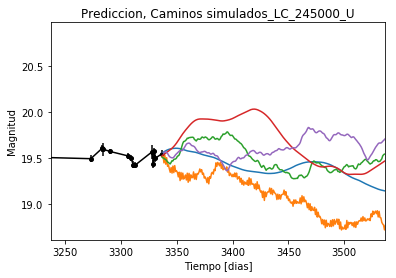

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_245000_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


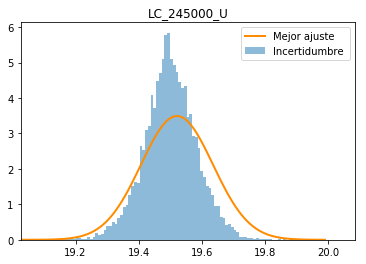

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_245000_U')
plt.savefig("Mejor_ajuste_LC_245000_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_245000_U')

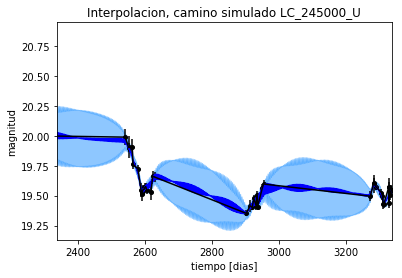

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_U')

Text(0.5,1,'Interpolacion, camino simulado LC_245000_U')

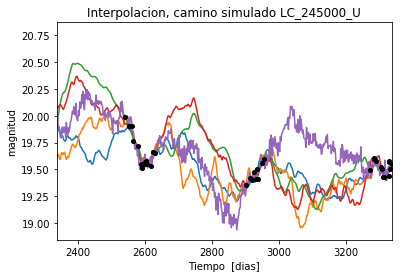

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 397.080871055
Median: 0.0253183167058
Standard deviation: 0.225615969305
68% credibility interval: [ 0.00179653  0.28667441]
95% credibility interval: [  3.97380423e-04   8.59882235e-01]
99% credibility interval: [  3.22581412e-04   1.02864088e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 327.025323579
Median: 0.00881096930178
Standard deviation: 0.111979835249
68% credibility interval: [ 0.00059091  0.07986176]
95% credibility interval: [  3.29738521e-04   3.66689810e-01]
99% credibility interval: [  3.07650699e-04   7.91094377e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 285.876451707
Median: 0.0441276873899


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 674.682562033
Median: 77.6907944494
Standard deviation: 1.90499057604
68% credibility interval: [ 75.55725354  79.1024982 ]
95% credibility interval: [ 72.86077381  80.39428595]
99% credibility interval: [ 70.87850815  81.82756042]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 303.212728025
Median: 0.94200107946
Standard deviation: 2.59103694028
68% credibility interval: [ 0.16951747  4.90362782]
95% credibility interval: [ 0.03555458  9.00703236]
99% credibility interval: [  0.01600048  11.42076564]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 848.651117463
Median: 3.39109813584
Standard deviation: 12.4950879356
68% credibility interval: [  0.17833501  21.72174983]
95% credibility interval: [  1.65485210e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15317.4116891
Median: 6.24661297133e-23
Standard deviation: 2.84600081309e+127
68% credibility interval: [  4.19528501e-70   2.89423413e-05]
95% credibility interval: [  2.31253245e-99   9.90804554e+16]
99% credibility interval: [  4.81231433e-107   2.77298153e+076]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1916.74708256
Median: 19.8911140277
Standard deviation: 0.200640801391
68% credibility interval: [ 19.7063064   20.06977999]
95% credibility interval: [ 19.48525647  20.27395457]
99% credibility interval: [ 19.2634675   20.46619957]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 283.798721726
Median: 0.126322510845
Standard deviation: 0.319525415225
68% credibility interval: [ 0.          0.69580306]
95% credibility interval: [ 0.          0.99798414]
99% credibility interval: [ 0.          1.05200175]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 283.798721726
Median: 0.126322510845
Standard deviation: 0.319525415225
68% credibility interval: [ 0.          0.69580306]
95% credibility interval: [ 0.          0.99798414]
99% credibility interval: [ 0.          1.05200175]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 530.885311792
Median: 0.0
Standard deviation: 0.000476063219509
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 674.682562033
Median: 77.6907944494
Standard deviation: 1.90499057604
68% credibility interval: [ 75.55725354  79.1024982 ]
95% credibility interval: [ 72.86077381  80.39428595]
99% credibility interval: [ 70.87850815  81.82756042]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1740.91064919
Median: 0.177188481197
Standard deviation: 0.126229738266
68% credibility interval: [ 0.11470844  0.28170149]
95% credibility interval: [ 0.07972581  0.49327281]
99% credibility interval: [ 0.06464975  0.78109672]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 6109.00235186
Median: 1.17250356879
Standard deviation: 0.221525005481
68% credibility interval: [ 0.96444271  1.40263411]
95% credibility interval: [ 0.80377919  1.66802535]
99% credibility interval: [ 0.70938714  1.83945071]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 286.301408283
Median: 0.0179894290283
Standard deviation: 0.442071987693
68% credibility interval: [ 0.00037671  0.18888522]
95% credibility interval: [  2.71287204e-20   1.04857983e+00]
99% credibility interval: [  4.13680762e-79   3.09102094e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 397.080871055
Median: (-0.159079675529-0.939414035068j)
Standard deviation: 2.4576738288
68% credibility interval: [-1.80122843+0.j         -0.01128795-6.27821162j]
95% credibility interval: [ -5.40279942e+00+0.j          -2.49681483e-03-2.09725881j]
99% credibility interval: [ -6.46314127e+00-4.85646302j  -2.02683879e-03-1.53822931j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 327.025323579
Median: (-0.055360952859+2.25482462936j)
Standard deviation: 2.12735678082
68% credibility interval: [-0.50178624+4.60961034j -0.00371281+0.04474359j]
95% credibility interval: [ -2.30398003e+00+5.02118557j  -2.07180823e-03+0.j        ]
99% credibility interval: [ -4.97059257e+00+4.91999307j  -1.93302635e-03+0.j        ]
Poster